In [2]:
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!nvidia-smi

Mon Oct 21 16:51:12 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip '/content/drive/My Drive/Multi_Label_dataset.zip'

Archive:  /content/drive/My Drive/Multi_Label_dataset.zip
   creating: Multi_Label_dataset/
  inflating: Multi_Label_dataset/train.csv  
   creating: Multi_Label_dataset/Images/
  inflating: Multi_Label_dataset/Images/tt0095159.jpg  
  inflating: Multi_Label_dataset/Images/tt0094980.jpg  
  inflating: Multi_Label_dataset/Images/tt0094964.jpg  
  inflating: Multi_Label_dataset/Images/tt0094907.jpg  
  inflating: Multi_Label_dataset/Images/tt0094884.jpg  
  inflating: Multi_Label_dataset/Images/tt0094869.jpg  
  inflating: Multi_Label_dataset/Images/tt0094862.jpg  
  inflating: Multi_Label_dataset/Images/tt0094746.jpg  
  inflating: Multi_Label_dataset/Images/tt0094739.jpg  
  inflating: Multi_Label_dataset/Images/tt0094731.jpg  
  inflating: Multi_Label_dataset/Images/tt0094651.jpg  
  inflating: Multi_Label_dataset/Images/tt0094606.jpg  
  inflating: Multi_Label_dataset/Images/tt0094594.jpg  
  inflating: Multi_Label_dataset/Images/tt0093744.jpg  
  inflating: Multi_Label_dataset/Image

In [0]:
'''from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))'''

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [5]:
train = pd.read_csv('./Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [0]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
#X = np.array(train_image)

100%|██████████| 7254/7254 [00:27<00:00, 267.89it/s]


In [0]:
X = np.array(train_image)

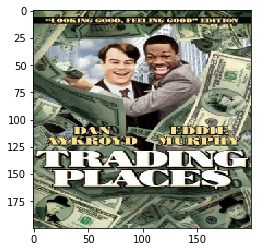

In [0]:
plt.imshow(X[2])

In [0]:
train['Genre'][2]

"['Comedy']"

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 43, 43, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
!pip install -U tensorboardcolab
from tensorboardcolab import *

Requirement already up-to-date: tensorboardcolab in /usr/local/lib/python3.6/dist-packages (0.0.22)


In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://fca1c17f.ngrok.io


In [0]:
es=keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=1, mode='auto')


In [31]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64,verbose=1,callbacks=[es,TensorBoardColabCallback(tbc)])

Train on 6528 samples, validate on 726 samples
Epoch 1/20
6528/6528 [==============================] - 15s 2ms/step - loss: 0.3773 - acc: 0.8497 - val_loss: 0.2570 - val_acc: 0.9063
Epoch 2/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2775 - acc: 0.9025 - val_loss: 0.2462 - val_acc: 0.9061
Epoch 3/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2644 - acc: 0.9055 - val_loss: 0.2452 - val_acc: 0.9067
Epoch 4/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2588 - acc: 0.9059 - val_loss: 0.2442 - val_acc: 0.9067
Epoch 5/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2564 - acc: 0.9065 - val_loss: 0.2427 - val_acc: 0.9067
Epoch 6/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2541 - acc: 0.9067 - val_loss: 0.2423 - val_acc: 0.9061
Epoch 7/20
6528/6528 [==============================] - 14s 2ms/step - loss: 0.2529 - acc: 0.9071 - val_loss: 0.2418 - val_acc: 0.9067
Epoch 8/

In [0]:
model.save('my_model.h5')
#tbc.save_image(title='test_title', image=image)

In [0]:
model = load_model('my_model.h5')

In [0]:
model.save_weights("model_num.h5")

In [0]:
img = image.load_img('/content/drive/My Drive/GOT.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.535)
Action (0.288)
Thriller (0.274)


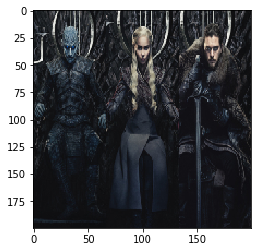

In [39]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)


In [0]:
img = image.load_img('/content/drive/My Drive/avengers.jpeg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.536)
Action (0.274)
Thriller (0.24)


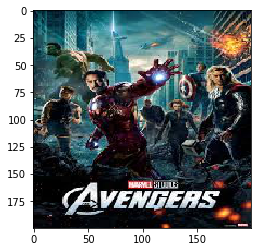

In [43]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/golmal.jpeg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Comedy (0.634)
Drama (0.465)
Romance (0.248)


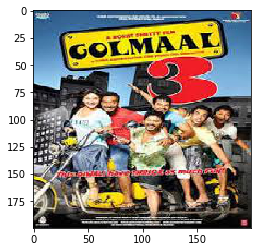

In [49]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [1]:
model=load_model('./static/my_model_GPU.h5')

NameError: name 'load_model' is not defined

In [ ]:
img = image.load_img('titanic.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)